# **Audio Classification**

This project classifies different audio filed into Music, Noise or Speech. The dataset used for training and testing of the model is Musan Dataset. The preprocessed data is already stored in a JSON file so no need to run the preprocessing function again, just load the JSON file.

### All of the imports
* **OS:** It helps in navigating through directories and loading models.  
* **JSON:** Writes to or reads from a JSON File, which is used for storing data for later use.  
* **Librosa:** Helps in audio analysis.  
* **Numpy:** Used for numerical operations on arrays.  
* **Pandas:** Used for data manipulation and analysis.  
* **Seaborn:** Used for data visualization.  
* **Matplotlib.pyplot:** Used for creating static, animated, and interactive visualizations.  
* **tqdm:** Used for showing progress bars in loops or iterations.  
* **Sklearn:**  
    * *model_selection import train_test_split:* Splits the whole data in training and testing datasets.  
    * *preprocessing import LabelEncoder:* Converts categorical labels (like "music" or "noise") into numeric labels (like 0 or 1).  
    * *metrics import confusion_matrix:* Helps visualize confusion matrix for performance analysis.  
    * *metrics import classification_report* Provides a summary report for performance analysis.  
* **Tensorflow.keras:**  
    * *models import Sequential:* Sequential model is a linear stack of layers used to build neural networks layer by layer.  
    * *layers import Dense:* Type of layer in neural networks where each neuron is connected to every neuron in the previous layer.  
    * *layers import Droput:* Regularization technique that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.
    * *utils import to_categorical:* converts integer labels into one-hot encoded vectors, which are often needed for classification tasks (e.g., converting a class label like 1 to [0, 1, 0]).  
    * *models import load_model:* loads a pre-trained model from a file.  

In [1]:
import os 
import json
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

### Variables 

In [4]:
Data_Path = "E:\Solved lab tasks\SnS Project\musan\musan"
Output_JSON = "E:\Solved lab tasks\SnS Project\musan_preprocessed_features.json"
Features_JSON = "E:\Solved lab tasks\SnS Project\musan_preprocessed_features.json"

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Choice\AppData\Local\Temp\ipykernel_30188\3058274305.py:1: SyntaxWarning: invalid escape sequence '\S'
  Data_Path = "E:\Solved lab tasks\SnS Project\musan\musan"
C:\Users\Choice\AppData\Local\Temp\ipykernel_30188\3058274305.py:2: SyntaxWarning: invalid escape sequence '\S'
  Output_JSON = "E:\Solved lab tasks\SnS Project\musan_preprocessed_features.json"
C:\Users\Choice\AppData\Local\Temp\ipykernel_30188\3058274305.py:3: SyntaxWarning: invalid escape sequence '\S'
  Features_JSON = "E:\Solved lab tasks\SnS Project\musan_preprocessed_features.json"


### Stage1 - Preprocessing and Feature Extraction
---
**OBJECTIVE:** Clean the audio data and extract important characteristics (features) to help the model classify sounds.  

* **RESAMPLING:** The number of samples in 1 second, with sample rate 16,000 we reduce the size of the data while retaining sufficient quality for tasks like classification, also it is commonly used for audio classification.  
* **NORMALIZING:** Adjusts the loudness between -1 to 1 so all of the audio files are on the same scale.  
* **TRIMMING:** Removes silence periods from start and end of audio files. The *top_db* parameter sets the threshold below the maximum amplitude of the audio signal to consider as "silence."  
* **MFCCs:** Mel-Frequrncy Cepstral Coefficients, describes the shape of the sound spectrum and is good for sound analysis, important for distinguishing between speech, music, and noise.  
* **ZCR:** Zero Crossing Rate, measures how often the signal changes direction. Differentiates between periodic (speech/music) and non-periodic signals (noise).  
* **RMS:** Root Mean Square, measures the energy of the signal, useful for distinguishing loud noise from soft speech or music.  
---

**1. def preprocess_features(dataPath, sample_rate)**  
> *Preprocess an audio file and extract features.*  
    >> Args:  
        >>> dataPath (str): *Path to the audio file.*  
        >>> sample_rate (int): *Target sample rate for resampling.*  

>> Returns:  
    >>> dict: *A dictionary containing preprocessed data and features.*  

**2. def process_data(datasetPath, outputJson)**  
> *Process the entire MUSAN dataset and save features to a JSON file.*  
    >> Args:  
        >>> datasetPath (str): *Path to the dataset.*  
        >>> outputJson (str): *Path to the output JSON file.*  

In [9]:
def preprocess_features(dataPath, sample_rate=16000):
    try:
        # load audio file
        audio, sr = librosa.load(dataPath, sr=sample_rate)
        
        # normalize audio 
        audio = librosa.util.normalize(audio)
        
        # trim silence - top_db is the threshold for considering a frame as silence
        audio, _ = librosa.effects.trim(audio, top_db=20)
        
        # extract features - n_mfcc is the number of MFCCs to return
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        rms = librosa.feature.rms(y=audio)
        
        # aggregate features
        features = {
            "mfccs": mfccs.mean(axis=1).tolist(),
            "zcr": zcr.mean().item(),
            "rms": rms.mean().item()
        } # tolist() converts numpy array to list, item() converts numpy scalar to Python scalar
        print(f"Processed {dataPath}\n")
        
        return {"audio_path": dataPath, "features": features}
    
    except Exception as e:
        print(f"Error processing {dataPath}: {e}")
        return None
    
    
def process_data(datasetPath, outputJson):
    results = []
        
    # walk through all files in the dataset folder and subfolders
    for root, _, files in os.walk(datasetPath):
        for file in files:
            if file.endswith(".wav"):
                filePath = os.path.join(root, file)
                result = preprocess_features(filePath)
                if result:
                    results.append(result)
                        
    # save results to json file
    with open(outputJson, "w") as file:
        json.dump(results, file, indent=4)
           
    print(f"Preprocessed data and features saved to {outputJson}")

In [10]:
process_data(Data_Path, Output_JSON) 

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0000.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0001.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0002.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0003.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0004.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0005.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0006.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0007.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0008.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0009.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-0010.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\music\fma\music-fma-00

d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(


Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0282.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0283.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0284.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0285.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0286.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0287.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0288.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0289.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0290.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0291.wav

Processed E:\Solved 

d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1657
  warnings.warn(


Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0567.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0568.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0569.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0570.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0571.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0572.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0573.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0574.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0575.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0576.wav

Processed E:\Solved 

d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2032
  warnings.warn(


Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0613.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0614.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0615.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0616.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0617.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0618.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0619.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0620.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0621.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0622.wav

Processed E:\Solved 

d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(


Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0625.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0626.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0627.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0628.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0629.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0630.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0631.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0632.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0633.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0634.wav

Processed E:\Solved 

d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1033
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=418
  warnings.warn(


Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0767.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0768.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0769.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0770.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0771.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0772.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0773.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0774.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0775.wav

Processed E:\Solved lab tasks\SnS Project\musan\musan\noise\free-sound\noise-free-sound-0776.wav

Processed E:\Solved 

### Stage2 - Building the Classification Model
---
**OBJECTIVE:** Build an effective model to classify different audios. The classification model will use the preprocessed data and features from Stage 1.  

--- 
**CHOOSE A MODEL ARCHITECTURE**  
* *Input Layer*  
    * Take 13 MFCCs, ZCR and RMS as inputs  
* *Hidden Layer*  
    * Dense layers to learn complex patterns in the data.  
    * Dropout to prevent overfitting.  
* *Output Layer*
    * Three neurons representing the three classes (speech, music, noise). 
    * **Softmax Activation:** Converts outputs into probabilities. For example, if the raw outputs are [2.3, 0.8, 0.1], after applying softmax, you will get probabilities like [0.7, 0.2, 0.1]. This makes it clear that the model predicts "speech" with 70% probability, "music" with 20%, and "noise" with 10%.  

---
**REASONS FOR CHOOSING NEURAL NETWORKS**
* *Flexibility*  
    * Handles a mix of sequential(*meaning they represent audio data over time*) and tabular(*capture the overall characteristics of the signal without focusing on the time relationship*) features (e.g., MFCCs + ZCR + RMS) at the same time.  
* *Efficiency*  
    * Dense layers(*type of fully connected layer in neural networks where each neuron is connected to every neuron in the previous layer*) are computationally efficient for small datasets. The dense neural network model is suitable because it’s efficient in terms of memory and processing power.  
* *Accuracy*  
    * Neural networks outperform simpler models (e.g., logistic regression) because they can model complex, non-linear relationships in data, which is crucial for distinguishing between different types of audio signals (speech, music, and noise).  
      
---

**1. def load_features(jsonPath)**  
> *Loads the preprocessed features and labels from the provided JSON file.  
The function assumes that each entry in the JSON contains 'features' which include MFCCs, Zero-Crossing Rate (ZCR), and RMS. It also extracts the label (speech, music, or noise) based on the directory structure of the audio files.*  
    >> Args:  
        >>> jsonPath (str): *Path to the JSON file containing the preprocessed data.*  

>> Returns:  
    >>> np.array: *Feature matrix X with each row being a feature vector.*    
    >>> np.array: *Array y containing the corresponding labels.*  

**2. def build_model(input_dim)**  
> *Builds and compiles a neural network model for the audio classification task.*  
    >> Args:  
        >>> input_dim (int): *The dimensionality of the input features.*  

>> Returns:  
    >>> model: *The compiled neural network model.*

In [6]:
def load_features(jsonPath):
    with open(jsonPath, "r") as file:
        data = json.load(file)
        
    X = []  # List to hold feature vectors
    y = []  # List to hold labels
    
    for entry in data:
        features = entry["features"]
        # combining MFCCs, ZCR, and RMS into one feature vector
        feature_vector = features["mfccs"] + [features["zcr"], features["rms"]]
        X.append(feature_vector)
        
        # Labels are derived from the folder names: speech, music, noise
        label = entry["audio_path"].split("\\")[-3]
        # print(f"Label: {label}")
        y.append(label)
        
    return np.array(X), np.array(y)

def build_model(input_dim):
    # Sequential model: Simple stack of layers, best for this linear input-output task
    model = Sequential([
        # First Dense Layer: 128 neurons with ReLU activation
        # ReLU helps the model learn complex patterns and non-linearity efficiently
        # 128 neurons to capture enough complexity without being too large (preventing overfitting)
        Dense(128, activation="relu", input_dim=input_dim),
        
        # Dropout Layer: Drop 30% of neurons randomly during training
        # Prevents overfitting by forcing the model to generalize better
        Dropout(0.3), 
        
        # Second Dense Layer: 64 neurons with ReLU activation
        # ReLU activation continues to help with non-linearity, and 64 neurons help learn features at a lower level
        Dense(64, activation="relu"),
        
        # Dropout Layer: Drop 30% of neurons again to help with regularization
        Dropout(0.3),
        
        # Output Layer: 3 neurons (for 3 classes: Speech, Music, Noise)
        # Softmax activation converts output into probabilities (sum of 1), selecting the class with the highest probability
        Dense(3, activation="softmax")
    ])
    
    # Adam Optimizer: Efficient and widely used optimizer that adapts learning rates for each parameter
    # Categorical Crossentropy Loss: Suitable for multiclass classification problems
    # Accuracy Metric: Measures the percentage of correct predictions
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [7]:
# load features and labels and ecnode labels
X, y = load_features(Features_JSON)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) # Encodes labels as integers
y_categorical = to_categorical(y_encoded) # Converts to one-hot encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

### Stage3 - Training and Testing 
---
**OBJECTIVE:** Train the model using the training dataset and the evaluate the model using the testing dataset.    

--- 
**TRAINING THE MODEL**  
* To train the model on the training dataset(*X_train and y_train*), we will use the **fit()** method in Keras.  
    * This method requires the training data, labels, number of epochs (*iterations*) and the batch size (*how many samples are processed before updating the model’s weights*).
    * Imagine a training dataset with 1000 samples and a batch size of 100. One epoch would involve processing all 1000 samples, which would be done in 10 batches of 100 samples each.  
* The model processes the input features and compares it with its labels, and then the model's weights are updated while minimizing the loss function.  
* The model then tests itself using the validation data after each epoch to ensure it doesn't overfit.  
* Monitor the training and validation loss and accuracy for each epoch.
    * *Accuracy Plot:* Shows if the model is improving or not.  
    * *Loss Plot:* Shows how the model is minimizing the loss function.   

---
**TESTING THE MODEL**
* We will evaluate the model on the testing data(*X_test, y_test*). This will help us see how well our model classifies the unseen data.    
    * The model processes the testing data and compares its predictions with the true labels(*y_test*) and hence accuracy(*% of correct preductions*) and loss(*error*) are calculated.

In [100]:
# Instantiate and train the model 
input_dim = X_train.shape[1]
model = build_model(input_dim)

trainedModel = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4170 - loss: 15.6605 - val_accuracy: 0.7475 - val_loss: 1.4062
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5826 - loss: 4.4922 - val_accuracy: 0.7500 - val_loss: 0.7855
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 2.3196 - val_accuracy: 0.7550 - val_loss: 0.6249
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6467 - loss: 1.5348 - val_accuracy: 0.7450 - val_loss: 0.5828
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 1.1889 - val_accuracy: 0.7450 - val_loss: 0.5844
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.9412 - val_accuracy: 0.7871 - val_loss: 0.5758
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.8008 - val_accuracy: 0.7748 - val_loss: 0.5626
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.7072 - val_accuracy: 0.7748 - val_loss

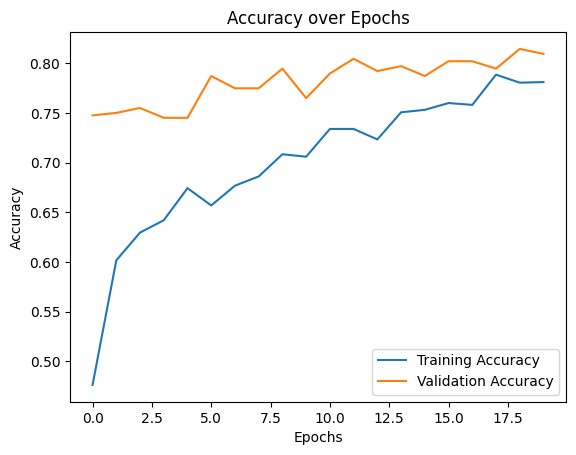

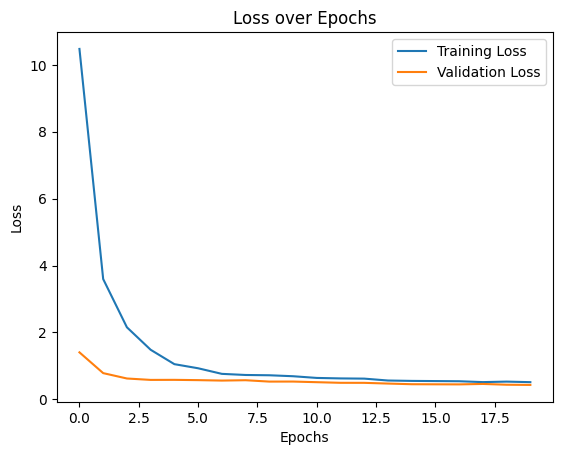

In [101]:
# plotting training and validation accuracy
plt.plot(trainedModel.history['accuracy'], label='Training Accuracy')
plt.plot(trainedModel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# plotting training and validation loss
plt.plot(trainedModel.history['loss'], label='Training Loss')
plt.plot(trainedModel.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [10]:
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Output the testing accuracy and loss
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7934 - loss: 0.4352
Testing Accuracy: 80.94%
Testing Loss: 0.4328385889530182


**CONFUSION MATRIX**  
* To better understand the performance of out model on individual classes(*speech, music and noise*). This matrix shows how many predictions for each class were correct and how many were misclassified.  
    * **True Labels (rows):** Represent the actual labels of the test dataset.  
        * *Row 1:* True music samples.  
        * *Row 2:* True noise samples.  
        * *Row 3:* True speech samples.  
    * **Predicted Labels (columns):** Represent the model's predictions.  
        * *Column 1:* Predicted as music.  
        * *Column 2:* Predicted as noise.  
        * *Column 3:* Predicted as speech.  

---
**CLASSIFICATION REPORT**  
* Provides detailed performance evaluation of our model for each class and overall performance.    
    * **Precesion:** Measures how many of the things our model said were correct were actually correct.  
    * **Recall:**  Measures how many of the actual correct things your model identified out of all of the true samples.  
    * **F1-Score:**  F1-score combines precision and recall into one number to balance them.  
    * **Suppot:**  The total number of actual examples of a specific category in our test data.  
    * **Macro Average:**  The average precision, recall, and F1-score across all categories, treating each category equally.  
    * **Weighted Average:**  The average precision, recall, and F1-score across all categories, weighted by the number of samples in each category.  

---
**SAVE AND LOAD THE MODEL**
* Saving the trained model after testing so we can just load the table for later use. 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


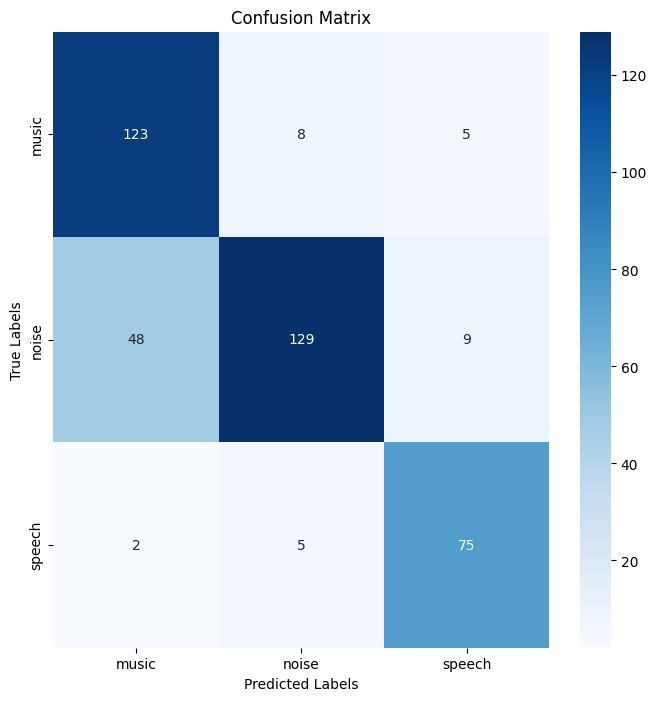

Classification Report: 
              precision    recall  f1-score   support

       music       0.71      0.90      0.80       136
       noise       0.91      0.69      0.79       186
      speech       0.84      0.91      0.88        82

    accuracy                           0.81       404
   macro avg       0.82      0.84      0.82       404
weighted avg       0.83      0.81      0.81       404



In [103]:
# get predictions for the test dataset
y_pred = model.predict(X_test)

# convert the predictions to the class with the highest probability
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# get the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")  
plt.show()
    
# classification report
print("Classification Report: ")
print(classification_report(y_true_labels, y_pred_labels, target_names=encoder.classes_))

In [104]:
# save the model to a file
model.save("E:\\Solved lab tasks\\SnS Project\\audio_classification_model.h5")

In [9]:
# load the model from a file
loadedModel = load_model("E:\\Solved lab tasks\\SnS Project\\audio_classification_model.h5")

# evaluate the loaded model
test_loss, test_accuracy = loadedModel.evaluate(X_test, y_test)
print(f"Loaded Model Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Loaded Model Testing Loss: {test_loss}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7934 - loss: 0.4352
Loaded Model Testing Accuracy: 80.94%
Loaded Model Testing Loss: 0.4328385889530182


## User Interactive Classification System

In [52]:
# Load the model
loadedModel = load_model("E:\\Solved lab tasks\\SnS Project\\audio_classification_model.h5")

# load the JSON file with preprocessed data
with open(Features_JSON, "r") as file:
    data = json.load(file)

class_labels = ["Music", "Noise", "Speech"]

def classifyAudio(file_number):
    features2, y = load_features(Features_JSON)
    feat = np.array(features2[file_number]).reshape(1, 15)
    prediction = loadedModel.predict(feat)
    # print(f"Prediction: {prediction}, prediction shape: {prediction.shape}")
    predicted_label = np.argmax(prediction)
    # print(f"predicted_label: {predicted_label}")
    
    
    print(f"File number {file_number} is classified as: {class_labels[predicted_label]} and the actual label is {y[file_number]}")


In [53]:
# Main interface loop
print("Welcome to Audio Classification!")
while True:
        user_input = int(input("Enter 1 to use an audio file from our dataset or 0 to exit: "))
        
        if user_input == 1:
            fileNum = int(input("Enter a number from 0-2015 to classify: "))
            classifyAudio(fileNum)
            
        elif user_input == 0:
            print("Exiting the Audio Classification System. Goodbye!")
            break
        
        else:
            print("Invalid input. Please choose 1 or 0.")

Welcome to Audio Classification!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
File number 100 is classified as: Music and the actual label is music
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
File number 2000 is classified as: Speech and the actual label is speech
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
File number 1000 is classified as: Noise and the actual label is noise
Exiting the Audio Classification System. Goodbye!
